<a href="https://colab.research.google.com/github/jojeongin313/2025-1-myclass-BDA/blob/main/inclass/forestfires%20-%20final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 분석주제 : 산불과 강수량의 상관관계

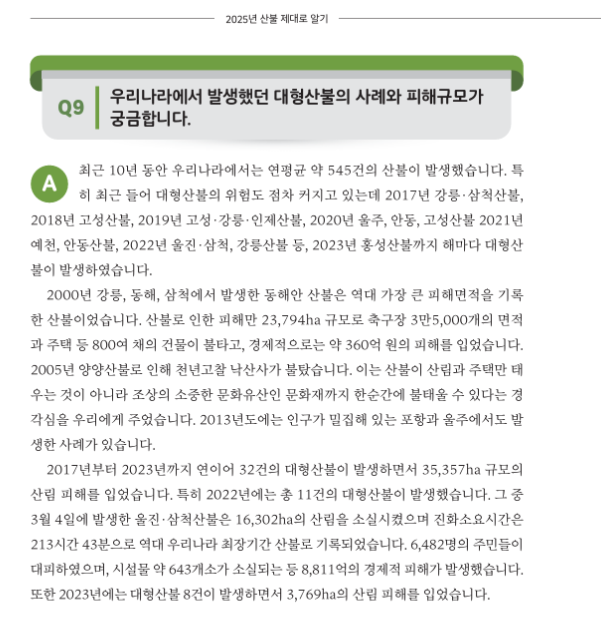

In [51]:
!apt-get -qq -y install fonts-nanum

import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import seaborn as sns
import pandas as pd
import numpy as np
import os


font_path = "/usr/share/fonts/truetype/nanum/NanumGothic.ttf"
fm.fontManager.addfont(font_path)
plt.rc('font', family='NanumGothic')
plt.rcParams['axes.unicode_minus'] = False


In [52]:
df = pd.read_excel('산불통계자료.xlsx', sheet_name='Sheet1')
df['산불건수'] = pd.to_numeric(df['산불건수'], errors='coerce')
df['산불면적'] = pd.to_numeric(df['산불면적(ha)'], errors='coerce')
df['강수량'] = pd.to_numeric(df['강수량(mm)'], errors='coerce')

In [53]:
# 결측값 제거
df_clean = df.dropna()

### 전체 데이터 출력

In [54]:
# 전체 데이터 출력
for sido in df['시도'].unique():
    print(f"\n{sido} 데이터:")
    print(df[df['시도'] == sido])



강원특별자치도 데이터:
         시도    연도   산불건수 산불면적(ha) 강수량(mm)     산불면적     강수량
0   강원특별자치도  2014   73.0    20.03    1006    20.03  1006.0
1   강원특별자치도  2015  125.0   237.21   893.9   237.21   893.9
2   강원특별자치도  2016   91.0    50.72  1065.1    50.72  1065.1
3   강원특별자치도  2017  103.0  1195.87  1101.8  1195.87  1101.8
4   강원특별자치도  2018   47.0   674.18    1450   674.18  1450.0
5   강원특별자치도  2019   78.0  3001.49  1094.6  3001.49  1094.6
6   강원특별자치도  2020   74.0   220.48  1575.1   220.48  1575.1
7   강원특별자치도  2021   49.0    90.17  1129.9    90.17  1129.9
8   강원특별자치도  2022   78.0  5272.72  1465.4  5272.72  1465.4
9   강원특별자치도  2023   66.0   250.73    1449   250.73  1449.0
10  강원특별자치도  2024   30.0    19.26  1298.5    19.26  1298.5

경기도 데이터:
     시도    연도   산불건수 산불면적(ha) 강수량(mm)   산불면적     강수량
11  경기도  2014   48.0     5.47     799   5.47   799.0
12  경기도  2015  150.0    94.31     820  94.31   820.0
13  경기도  2016  113.0    51.69  1016.1  51.69  1016.1
14  경기도  2017  161.0    55.04  1094.9  55.04  1094.9
15 

In [55]:
#10년간 총 산불건수
print(df.groupby('시도')['산불건수'].sum())

시도
강원특별자치도     814.0
경기도        1347.0
경상남도        522.0
경상북도        956.0
광주광역시        38.0
대구광역시       119.0
대전광역시        74.0
부산광역시       148.0
서울특별시       114.0
세종특별자치시      43.0
울산광역시       132.0
인천광역시       205.0
전라남도        450.0
전북특별자치도     296.0
제주특별자치도       3.0
충청남도        419.0
충청북도        267.0
Name: 산불건수, dtype: float64


In [56]:
#시도별 10년간 평균 산불건수, 평균 강수량 테이블
group_df =df.groupby('시도')[['산불건수', '강수량']].mean().reset_index()
group_df

,시도,산불건수,강수량
0,강원특별자치도,74.000000,1229.936364
1,경기도,122.454545,1220.363636
2,경상남도,47.454545,1523.500000
3,경상북도,86.909091,1154.772727
4,광주광역시,3.454545,1343.672727
5,대구광역시,10.818182,999.500000
6,대전광역시,6.727273,1286.563636
7,부산광역시,13.454545,1655.418182
8,서울특별시,10.363636,1229.490909
9,세종특별자치시,4.300000,1423.033333


# 지역,연도별 산불건수와 산불면적

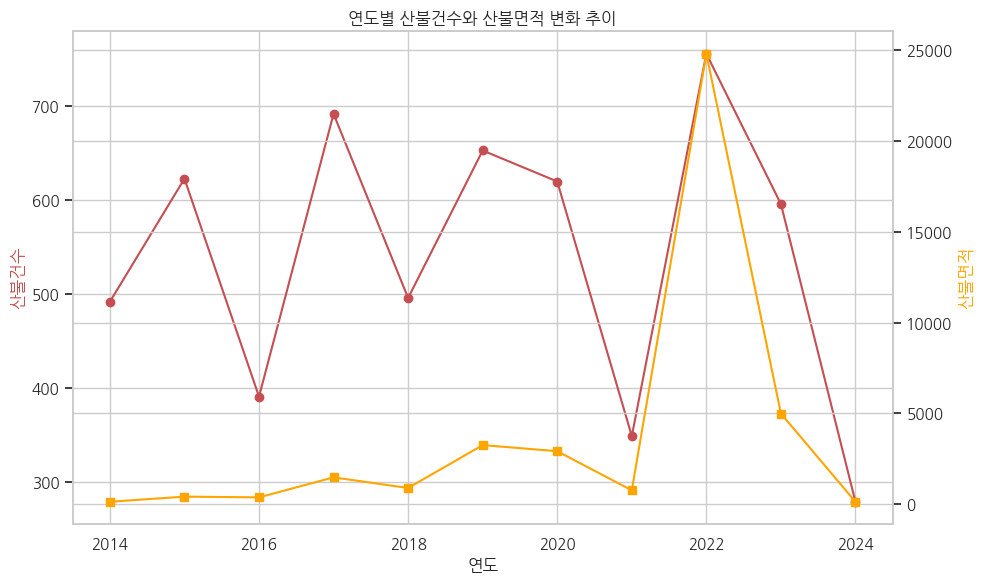

In [57]:
df_year = df.groupby('연도')[['산불건수', '산불면적']].sum().reset_index()
fig, ax1 = plt.subplots(figsize=(10,6))
ax2 = ax1.twinx()

ax1.plot(df_year['연도'], df_year['산불건수'], color='r', marker='o', label='산불건수')
ax2.plot(df_year['연도'], df_year['산불면적'], color='orange', marker='s', label='산불면적')

ax1.set_xlabel('연도')
ax1.set_ylabel('산불건수', color='r')
ax2.set_ylabel('산불면적', color='orange')
plt.title('연도별 산불건수와 산불면적 변화 추이')
plt.grid(True)
plt.tight_layout()
plt.show()


* 22년도에 특히 산불이 크게 많이 났음

### 지역별 산불건수와 강수량

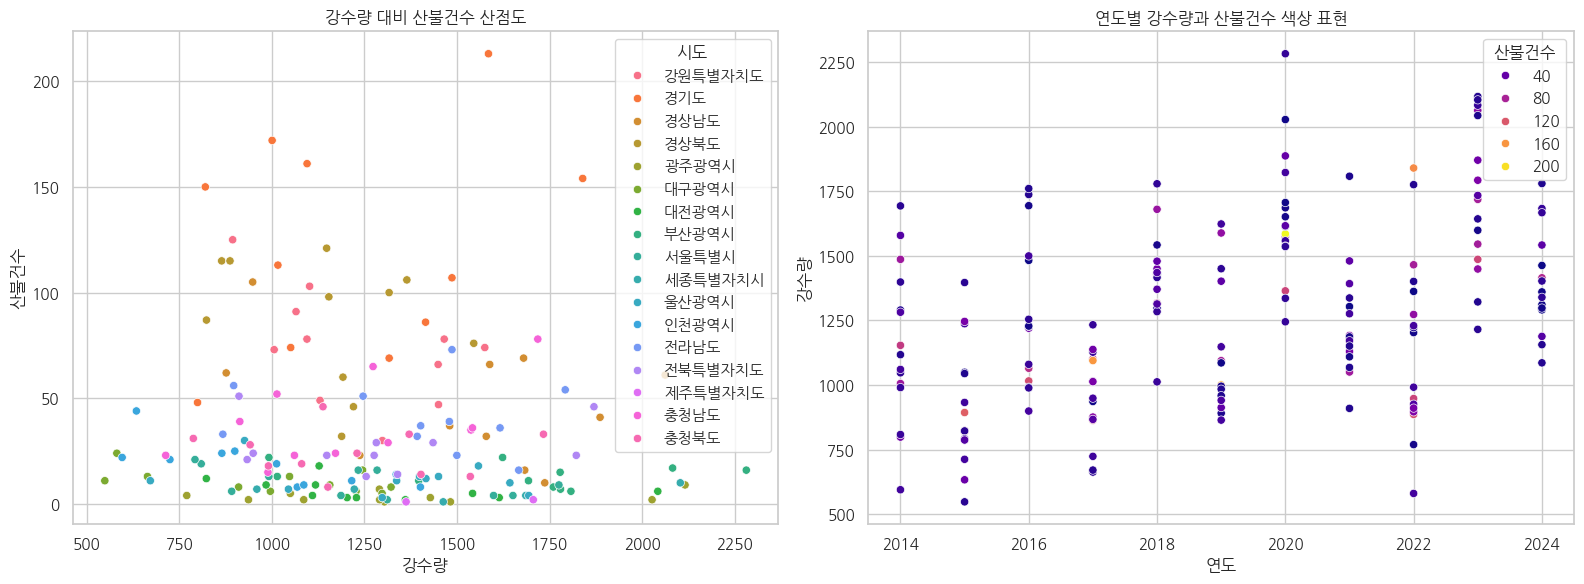

In [68]:

plt.figure(figsize=(16, 6))

# 1. 강수량 대비 산불건수 산점도
plt.subplot(1, 2, 1)
sns.scatterplot(data=df, x='강수량', y='산불건수', hue='시도')
plt.title('강수량 대비 산불건수 산점도')


# 2. 연도별 강수량과 산불건수 색상 표현
plt.subplot(1, 2, 2)
sns.scatterplot(data=df, x='연도', y='강수량', hue='산불건수', palette='plasma')
plt.title('연도별 강수량과 산불건수 색상 표현')



plt.tight_layout()
plt.show()


* 1. 강수량 대비 산불건수 산점도
 * 강수량의 분포는 모든지역에서 범주가 넓게 퍼져있으나 **경기도의 산불건수가 특히 높다.**
* 2. 연도별 강수량과 산불건수 색상 표현
 * 강수량이 낮다고 해서 항상 산불이 많은 건 아님
 * **일부 경향성은 존재:** 매우 낮거나 높은 강수량에서는 산불건수가 대체로 낮은 편

# 산불건수와 강수량의 상관관계 subplot


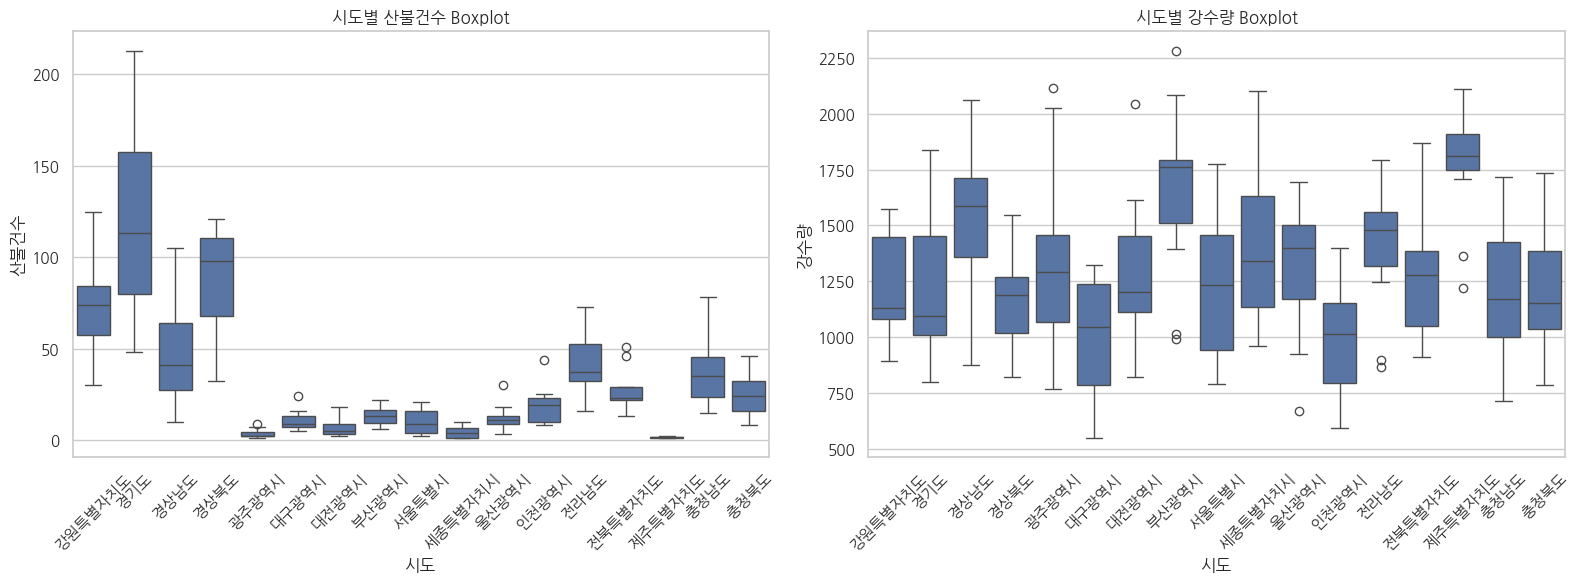

In [61]:
plt.figure(figsize=(16, 6))

# 1. 시도별 산불건수 Boxplot
plt.subplot(1, 2, 1)
sns.boxplot(data=df, x='시도', y='산불건수')
plt.xticks(rotation=45)
plt.title('시도별 산불건수 Boxplot')
plt.xlabel('시도')
plt.ylabel('산불건수')

# 2. 시도별 강수량 Boxplot
plt.subplot(1, 2, 2)
sns.boxplot(data=df, x='시도', y='강수량')
plt.xticks(rotation=45)
plt.title('시도별 강수량 Boxplot')
plt.xlabel('시도')
plt.ylabel('강수량')


plt.tight_layout()
plt.show()


산불건수는 시도별로 큰 차이가 있으며 특히 경기도에서 매우 높음

강수량은 모든 지역에서 연도별로 편차가 크며, 시도 간 극단적인 차이는 덜함

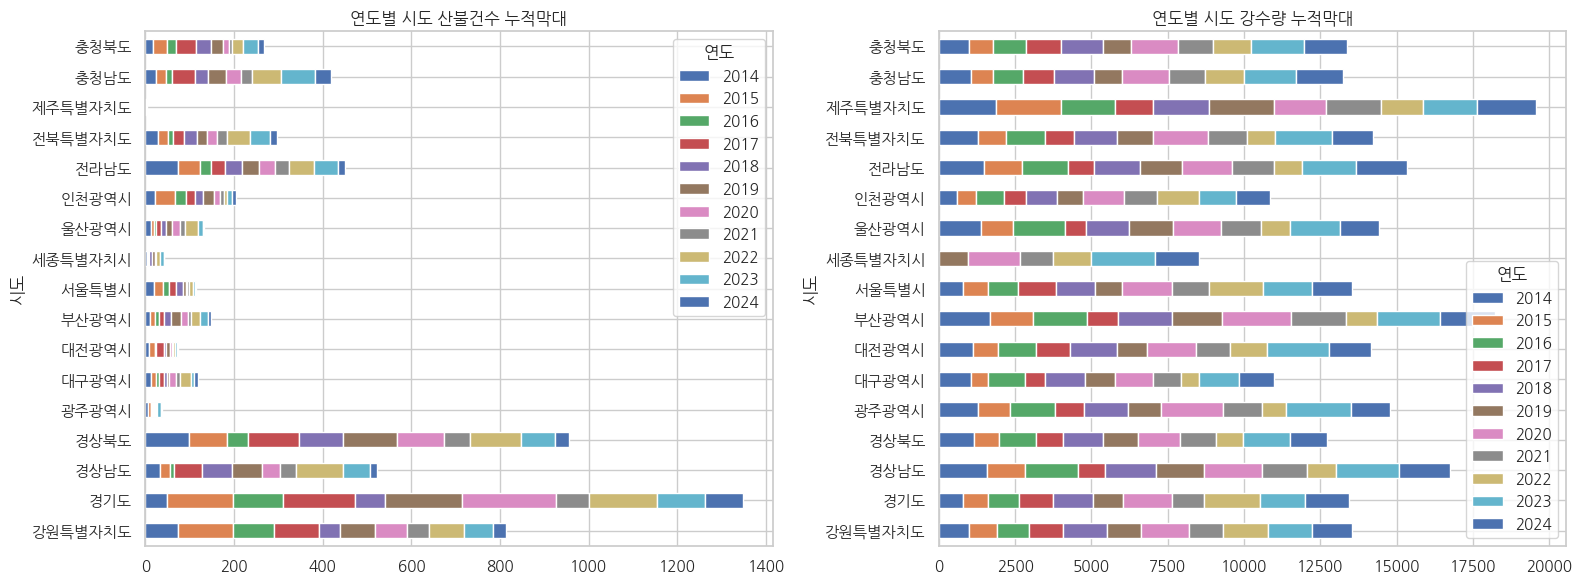

In [62]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# 1. 연도별 산불건수 누적막대
pivot_df1 = df.pivot_table(index='시도', columns='연도', values='산불건수', aggfunc='sum')
pivot_df1.plot(kind='barh', stacked=True, ax=axes[0])
axes[0].set_title('연도별 시도 산불건수 누적막대')

# 2. 연도별 강수량 누적막대
pivot_df2 = df.pivot_table(index='시도', columns='연도', values='강수량', aggfunc='sum')
pivot_df2.plot(kind='barh', stacked=True, ax=axes[1])
axes[1].set_title('연도별 시도 강수량 누적막대')

plt.tight_layout()
plt.show()


경기도, 강원특별자치도 -> 전국 산불 발생의 중심지 <br>
강수량은 대체로 모든 시도에서 비슷한 누적값

## 산불건수와 강수량의 상관관계 (비교)

지역명을 입력하세요: 서울특별시


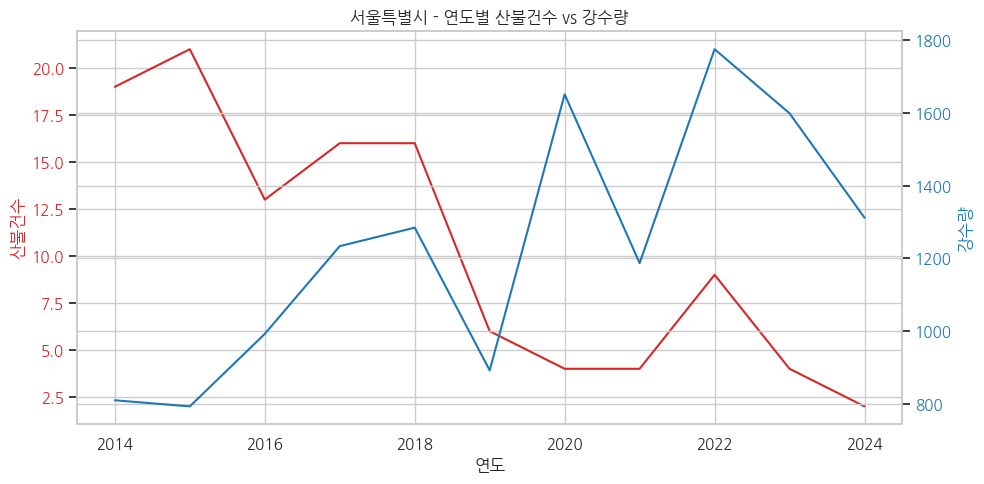

In [63]:
import matplotlib.pyplot as plt

def plot_fire_rain_by_region(region_name):
    df_region = df[df['시도'] == region_name]

    if df_region.empty:
        print(f"'{region_name}'에 해당하는 데이터가 없습니다.")
        return

    fig, ax1 = plt.subplots(figsize=(10, 5))

    color1 = 'tab:red'
    ax1.set_xlabel('연도')
    ax1.set_ylabel('산불건수', color=color1)
    ax1.plot(df_region['연도'], df_region['산불건수'], color=color1, label='산불건수')
    ax1.tick_params(axis='y', labelcolor=color1)

    ax2 = ax1.twinx()
    color2 = 'tab:blue'
    ax2.set_ylabel('강수량', color=color2)
    ax2.plot(df_region['연도'], df_region['강수량'], color=color2, label='강수량')
    ax2.tick_params(axis='y', labelcolor=color2)

    plt.title(f'{region_name} - 연도별 산불건수 vs 강수량')
    fig.tight_layout()
    plt.show()


region = input("지역명을 입력하세요: ")
plot_fire_rain_by_region(region)


강수량이 극히 낮은 년도에는 **산불**이 많이 났음

## 강수량과 산불건수의 상관관계 (파악)

In [64]:
# 시도별 평균 계산
avg_by_region = df.groupby('시도')[['강수량', '산불건수']].mean().rename(columns={'강수량': '평균강수량', '산불건수': '평균산불건수'})

# 원본 데이터에 병합
df2 = df.merge(avg_by_region, on='시도')

In [65]:
df2['강수량많음'] = df2['강수량'] > df2['평균강수량']
df2['강수량적음'] = df2['강수량'] < df2['평균강수량']
df2['산불많음'] = df2['산불건수'] > df2['평균산불건수']
df2['산불적음'] = df2['산불건수'] < df2['평균산불건수']


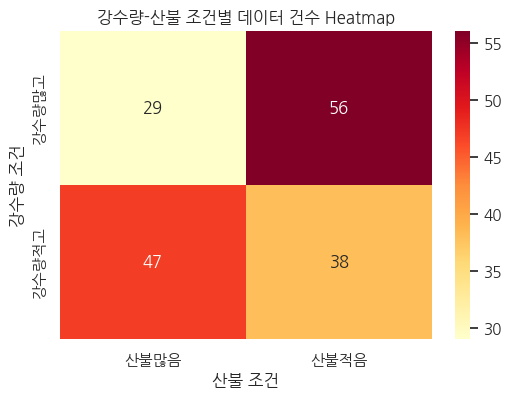

In [69]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 조건별로 몇 건씩 있는지
condition_counts = pd.DataFrame({
    '강수량많고_산불많음': ((df2['강수량많음']) & (df2['산불많음'])).sum(),
    '강수량많고_산불적음': ((df2['강수량많음']) & (df2['산불적음'])).sum(),
    '강수량적고_산불많음': ((df2['강수량적음']) & (df2['산불많음'])).sum(),
    '강수량적고_산불적음': ((df2['강수량적음']) & (df2['산불적음'])).sum(),
}, index=['건수']).T.reset_index()

# 인덱스 분리
condition_counts['강수량'] = condition_counts['index'].str.extract(r'(강수량많고|강수량적고)')[0]
condition_counts['산불'] = condition_counts['index'].str.extract(r'_(산불많음|산불적음)')[0]

# 피벗 테이블 만들기
pivot_table = condition_counts.pivot_table(index='강수량', columns='산불', values='건수', aggfunc='sum')

# 히트맵 그리기
plt.figure(figsize=(6, 4))
sns.heatmap(pivot_table, annot=True, cmap="YlOrRd", fmt=".0f")
plt.title("강수량-산불 조건별 데이터 건수 Heatmap")
plt.xlabel("산불 조건")
plt.ylabel("강수량 조건")
plt.show()


단순히 강수량이 많다고 해서 산불이 억제된다고 보긴 어려움
(계절적 요인, 바람, 지형 등 다른 변수 영향 가능성)

**강수량이 적을수록 산불 위험이 높은 경향**

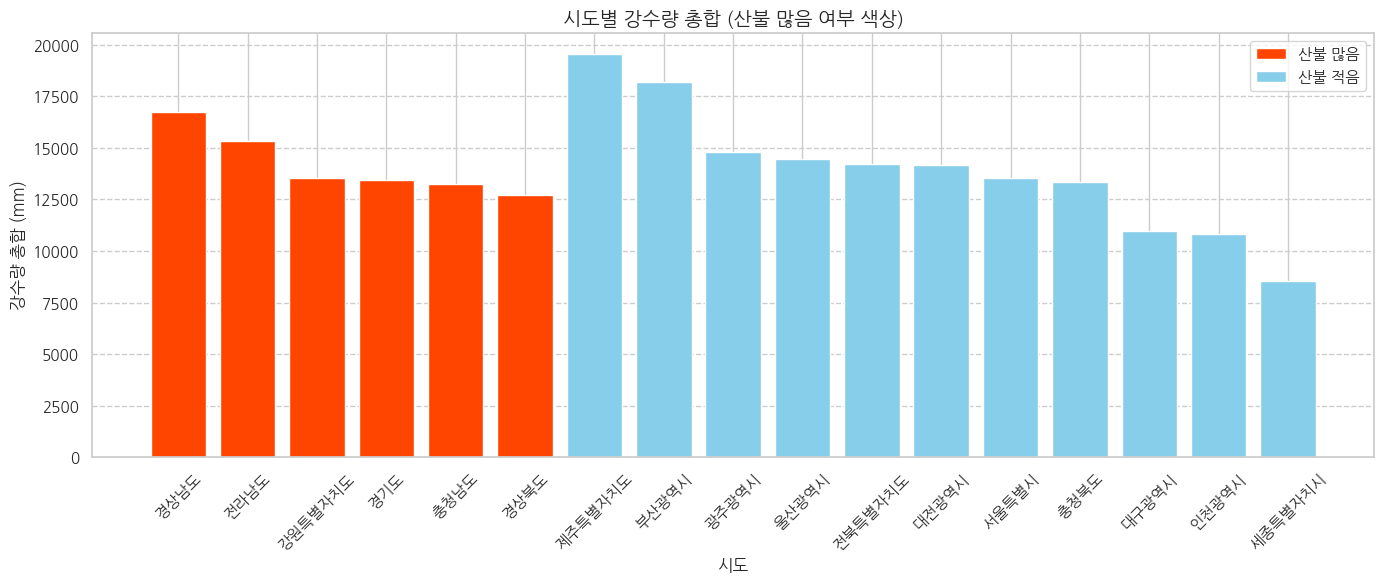

In [78]:
import pandas as pd
import matplotlib.pyplot as plt

# 1. 시도별 강수량, 산불건수 합계
summary = df2.groupby('시도')[['산불건수', '강수량']].sum()

# 2. 평균 산불건수 계산 및 산불많음 여부
avg_fire = summary['산불건수'].mean()
summary['산불많음'] = summary['산불건수'] > avg_fire

# 3. 데이터 분리
fire_high = summary[summary['산불많음'] == True].sort_values(by='강수량', ascending=False)
fire_low = summary[summary['산불많음'] == False].sort_values(by='강수량', ascending=False)

# 4. 시각화
plt.figure(figsize=(14, 6))

# 산불 많은 지역 (빨간색)
plt.bar(fire_high.index, fire_high['강수량'], color='orangered', label='산불 많음')

# 산불 적은 지역 (파란색)
plt.bar(fire_low.index, fire_low['강수량'], color='skyblue', label='산불 적음')

# 5. 설정
plt.title('시도별 강수량 총합 (산불 많음 여부 색상)', fontsize=14)
plt.xlabel('시도')
plt.ylabel('강수량 총합 (mm)')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--')
plt.legend()

plt.tight_layout()
plt.show()


경기도와 경상남도, 강원특별자치도 -> 강수량&산불건수 모두 많음<br>
